In [525]:
import pandas as pd
import numpy as np
from math import sqrt
from math import pi
from math import exp
import matplotlib.pyplot as plt

df = pd.read_csv('health_data.csv')

print(df.head())

   age  restbps  chol  category
0   26      109   243         0
1   27      106   156         0
2   28      107   225         0
3   27      105   277         0
4   30       96   221         0


In [526]:
#randomize indces, take the first 80% of the indices and last 20 percent as test
indices = np.random.permutation(df.shape[0])
train_ind, test_ind = indices[:int(0.7*df.shape[0])], indices[int(0.7*df.shape[0]):]
# print(len(train_ind), len(test_ind))

#select the data corresponding to the train and test indices and save into 2 dataframes. Reset index afterwards
train_df, test_df = df.loc[train_ind, :], df.loc[test_ind, :]
train_df, test_df = train_df.reset_index(), test_df.reset_index()

#print('Train data is : \n', train_df.head(), ' \nnumber of rows = {}'.format(train_df.shape[0]))
#print('Test data is : \n', test_df.head(), ' \nnumber of rows = {}'.format(test_df.shape[0]))

In [527]:
x_train = train_df.iloc[:,1:4]
y_train = train_df.iloc[:,4]

x_test = test_df.iloc[:,1:4]
y_test = test_df.iloc[:,4]

x_train['ones'] = 1
x_test['ones'] = 1

for col in ['age', 'restbps', 'chol']:
    x_train[col] = (x_train[col]-x_train[col].mean())/(x_train[col].std())
    x_test[col] = (x_test[col]-x_test[col].mean())/(x_test[col].std())
    
print(x_train.head())
print(y_train.head())
print(x_test.head())
print(y_test.head())

        age   restbps      chol  ones
0  0.837700  1.959891  0.131000     1
1 -0.475898 -0.582102  0.767523     1
2  0.008059  0.523112 -0.558567     1
3  0.975974  1.020459  0.908972     1
4  2.013025  0.688894  2.323467     1
0    1
1    0
2    0
3    1
4    1
Name: category, dtype: int64
        age   restbps      chol  ones
0  0.166285  0.467550 -0.337311     1
1  1.984568  0.786472  2.172849     1
2  0.031597  0.467550 -1.978570     1
3 -0.170434  0.308089 -0.318002     1
4  1.513162  1.583776  1.535654     1
0    0
1    1
2    0
3    0
4    1
Name: category, dtype: int64


In [528]:
X_train = x_train.to_numpy()
X_test = x_test.to_numpy()
print(X_train.shape)
print(X_test.shape)

print(W.shape)
Y_train = y_train.to_numpy()
Y_train = np.reshape(Y_train,(Y_train.shape[0],1))
Y_test = y_test.to_numpy()
Y_test = np.reshape(Y_test,(Y_test.shape[0],1))
print(Y_train.shape)
print(Y_test.shape)

(489, 4)
(211, 4)
(4, 1)
(489, 1)
(211, 1)


In [529]:
def sigmoid(x):
    return np.where(x >= 0, 
                    1 / (1 + np.exp(-x)), 
                    np.exp(x) / (1 + np.exp(x)))

def loss(W,X,Y):
    mean = sigmoid(np.matmul(X,W)) #assuming that the function will calc sigmoid elementwise
    #mean shape = (489,1)
    #y shape = (489,1)
    logloss = -(np.mean(np.multiply(Y,np.log(mean))) + np.mean(np.multiply(1-Y,np.log(1-mean))))
    
    #for i in range(Y.shape[0]):
        #logloss = logloss - Y[i]*np.log(mean[i]) - (1-Y[i])*np.log(1-mean[i])
    return logloss

def predict(W,X):
    Z = sigmoid(np.matmul(X,W))
    Z[Z>0.5] = 1
    Z[Z<=0.5] = 0
    return Z

In [530]:
def gradient(W,X,Y):
    mean = sigmoid(np.matmul(X,W))
    return np.matmul(X.T,(Y - mean))

def sgd(W,X,Y,X_test,Y_test,rate,num_iter):
    train_loss, test_loss =[], []
    for _ in range(0, num_iter):
        grad = gradient(W,X,Y)
        W = W + rate*grad
        train_loss.append(loss(W,X,Y))
        test_loss.append(loss(W,X_test,Y_test))
    return W, train_loss, test_loss

num_iter = 500
rate = 0.01

W = np.random.random((X_train.shape[1],1))

W, train_loss, test_loss = sgd(W,X_train,Y_train,X_test,Y_test,rate,num_iter)

print(W)

[[ 2.28281154]
 [ 1.0517955 ]
 [ 0.68910299]
 [-0.34862812]]


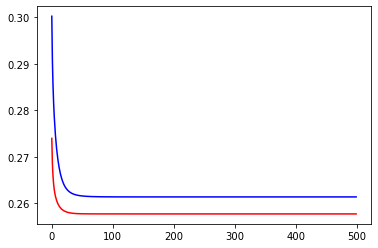

In [531]:
plt.plot(train_loss, 'r')
plt.plot(test_loss, 'b')
plt.show()

In [532]:
def performance_metrics(y_pred_test, y_test):
    '''gives the TPR, FPR, acc, precision, recall and F1 score by comparing the 2 input arrays'''
    #for precision, recall, class 1 will be positive class (ie the person ahs a health condition) 
    #and 0 as negative class (no health condition)
    TP = np.logical_and(y_pred_test==y_test,y_pred_test == 1).sum()
    FP = np.logical_and(y_pred_test!=y_test,y_pred_test == 1).sum()
    TN = np.logical_and(y_pred_test==y_test,y_pred_test == 0).sum()
    FN = np.logical_and(y_pred_test!=y_test,y_pred_test == 0).sum()
    ACC = (TP+TN)/(TP+TN+FP+FN)
    P = (TP)/(TP+FP)
    R = (TP)/(TP+FN)
    F1 = 2*P*R/(P+R)
    TPR = R
    FPR = FP/(FP+TN)
    
    return {'accuracy':ACC, 'precision':P, 'recall':R, 'F1':F1, 'TPR':TPR, 'FPR': FPR}

performance_metrics(predict(W,X_test),Y_test)

{'accuracy': 0.8767772511848341,
 'precision': 0.8131868131868132,
 'recall': 0.891566265060241,
 'F1': 0.8505747126436781,
 'TPR': 0.891566265060241,
 'FPR': 0.1328125}